In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv("soft_pf0.1_sp100_lp100_reduced10_reduced1.density",delim_whitespace=True,header=None)
#df=pd.read_csv("soft_pf0.1_sp050_lp100_condensed.density",delim_whitespace=True,header=None)

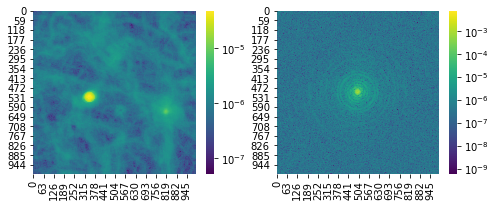

In [6]:

#df=pd.read_csv("soft_pf0.1_sp050_lp100_condensed.density",delim_whitespace=True,header=None)
fig,ax = plt.subplots(1,2,figsize=(8,3))
#sns.heatmap(df,cmap=cm.viridis,ax=ax[0])
data = df.replace(0,1e-10)
data=data/data.sum().sum()
min_data = data.min().min()
if (min_data == 0):
    min_data = 1
max_data = data.max().max()
log_norm = LogNorm(vmin=min_data, vmax=max_data)
cbar_ticks = [10**i for i in 
              range(int(np.floor(np.log10(min_data))),
                    1 + int(np.ceil(np.log10(max_data))))]
sns.heatmap(data, norm=log_norm,
            cmap=cm.viridis, ax=ax[0],
            cbar_kws={"ticks": cbar_ticks})
fft_data=np.fft.fftshift(np.fft.fft2(df))
data = np.abs(fft_data)
data=data/data.sum().sum()
min_data = data.min().min()
if (min_data == 0):
    min_data = 1
max_data = data.max().max()
log_norm = LogNorm(vmin=min_data, vmax=max_data)
cbar_ticks = [10**i for i in 
              range(int(np.floor(np.log10(min_data))),
                    1 + int(np.ceil(np.log10(max_data))))]
sns.heatmap(data, norm=log_norm,
            cmap=cm.viridis, ax=ax[1],
            cbar_kws={"ticks": cbar_ticks})
fig.savefig("test.png",dpi=300)

In [ ]:

fig.savefig("test.png",dpi=300)

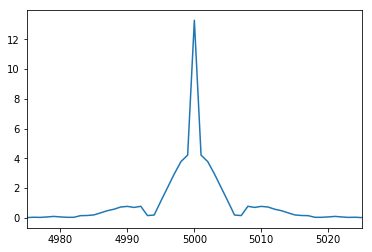

In [3]:
fft_data=np.fft.fftshift(np.fft.fft2(df))
data = np.abs(fft_data)
plt.figure()
plt.plot(data[data.shape[0]//2])
plt.xlim(4975,5025)
plt.show()

In [19]:
df=pd.read_csv("sp100_lp100_fft.txt",header=None)
df.columns=["data"]
df.data = df.data.apply(lambda x: x**2)

<Figure size 432x288 with 0 Axes>

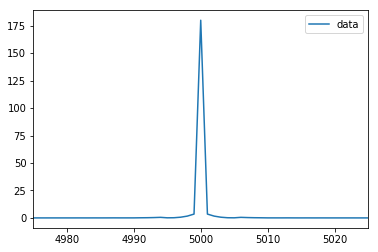

In [20]:
plt.figure()
df.plot(y='data')
plt.xlim(4975,5025)
plt.show()

(170, 190)

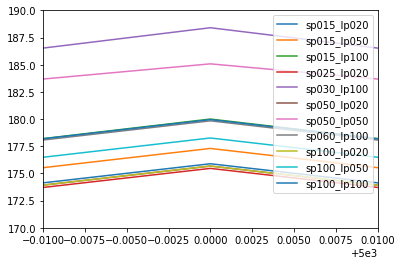

In [41]:
fig,ax=plt.subplots(1,1)
n=0.01
labels=[]
for i,sp in enumerate(['015','025','050','100']):
    for j,lp in enumerate(['020','050','100']):
        if sp=='025' and lp=='050':
            continue
        if sp=='050' and lp=='100':
            sp='060'
        if sp=='025' and lp=='100':
            sp='030'
        label='sp'+sp+'_lp'+lp
        fname = label+'_fft.txt'
        df=pd.read_csv(fname,header=None)
        df.columns=['data']
        df.data = df.data**2
        df.plot(ax=ax)
        labels.append(label)
        #f = open(fname,'r')
        #nums[i][j] = float(f.readline())
        #f.close()
ax.legend(labels)
ax.set_xlim(5000-n,5000+n)
ax.set_ylim(170,190)

In [24]:
nums

array([[13.2624296 , 13.31539209, 13.4165334 ],
       [13.24627185,  0.        , 13.54656982],
       [13.25441787, 13.60443475,  0.        ],
       [13.25436988, 13.35145461, 13.41455263]])

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,6.290640e-08,8.006270e-08,6.862520e-08,4.003130e-08,7.434390e-08,9.150020e-08,7.434390e-08,3.431260e-08,6.290640e-08,8.006270e-08,...,4.575010e-08,8.006270e-08,4.575010e-08,6.862520e-08,6.290640e-08,3.431260e-08,4.003130e-08,6.290640e-08,5.146890e-08,8.006270e-08
1,6.290640e-08,6.290640e-08,6.862520e-08,5.146890e-08,7.434390e-08,7.434390e-08,6.290640e-08,4.575010e-08,7.434390e-08,1.029380e-07,...,6.290640e-08,1.029380e-07,4.003130e-08,5.146890e-08,5.718760e-08,2.287510e-08,5.146890e-08,6.862520e-08,6.290640e-08,6.862520e-08
2,6.290640e-08,6.290640e-08,6.290640e-08,6.290640e-08,9.721900e-08,7.434390e-08,4.575010e-08,7.434390e-08,9.150020e-08,5.146890e-08,...,5.718760e-08,8.578150e-08,4.003130e-08,7.434390e-08,5.146890e-08,6.290640e-08,4.575010e-08,5.146890e-08,4.575010e-08,5.146890e-08
3,2.859380e-08,3.431260e-08,9.721900e-08,6.290640e-08,6.290640e-08,8.006270e-08,6.862520e-08,6.862520e-08,7.434390e-08,4.003130e-08,...,8.006270e-08,8.006270e-08,4.575010e-08,9.150020e-08,6.290640e-08,5.146890e-08,4.575010e-08,4.575010e-08,5.146890e-08,8.578150e-08
4,3.431260e-08,2.859380e-08,9.721900e-08,9.721900e-08,5.146890e-08,6.290640e-08,5.718760e-08,6.290640e-08,6.290640e-08,5.146890e-08,...,8.006270e-08,7.434390e-08,5.718760e-08,8.006270e-08,4.575010e-08,2.859380e-08,2.859380e-08,4.003130e-08,2.287510e-08,9.150020e-08


KeyboardInterrupt: 

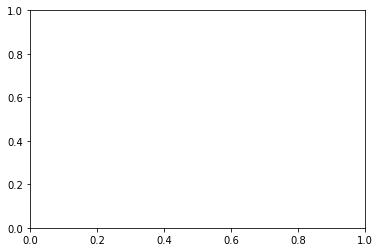

In [45]:
plt.pcolor(df)

In [13]:
df=pd.read_csv("soft_pf0.1_sp100_lp100_reduced10_reduced1.structure",
               header=None,delim_whitespace=True)
#df=pd.read_csv("soft_pf0.1_sp050_lp050_reduced10_reduced1.structure",
#               header=None,delim_whitespace=True)
#df=pd.read_csv("soft_pf0.1_sp050_lp100_reduced10_reduced1.structure",
#               header=None,delim_whitespace=True)

In [14]:
#df.columns=['k_x','k_y','data']

In [15]:
#df=df.pivot(index='k_x',columns='k_y',values='data')

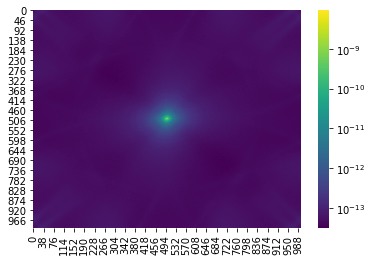

In [16]:
#data=df.replace(0,1e-9)
data=df
min_data = data.min().min()
#if (min_data == 0):
#    min_data = 1e-9
max_data = data.max().max()
log_norm = LogNorm(vmin=min_data, vmax=max_data)
cbar_ticks = [10**i for i in 
              range(int(np.floor(np.log10(min_data))),
                    1 + int(np.ceil(np.log10(max_data))))]
sns.heatmap(np.fft.fftshift(data), norm=log_norm,
            cmap=cm.viridis,
            cbar_kws={"ticks": cbar_ticks})

In [17]:
data_shift=np.fft.fftshift(data)
data_1d = data_shift[data_shift.shape[0]//2]

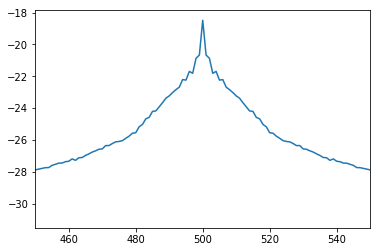

In [18]:
n=50
plt.figure()
plt.plot(np.log(data_1d))
plt.xlim(500-n,500+n)
plt.show()

In [19]:
k=4-5j

In [37]:
np.abs(k)

6.4031242374328485

In [39]:
np.sqrt(16-25)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

In [47]:
df.shape

(1000, 1000)